In [74]:
using DataFramesMeta

include("src/Spectrum.jl")
include("src/ModeSolutions.jl")

view_field (generic function with 1 method)

## 配置参数范围，扫描给定波长范围的基频模式

In [61]:
lambda = [1540, 1560] # 扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 20 # WGM 半径
n = 1.5 # 折射率
n_num_max = 20 # 扫描最大径向阶数

# 扫谱
data = spectrum(lambda, mode, n_num_max, n, R, option="all");

Finished ✓      100%|███████████████████████████████████| Time: 0:09:59


### 基频模式存入文件

In [71]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda'nm' n_max=$n_num_max mode=$mode.csv", data)

"/Users/wenzhengliu/Research/temp_data/radius=20 refractive_id=1.5 wavelength=[1540, 1560]'nm' n_max=20 mode=TE.csv"

## 配置参数范围，扫描给定波长范围的倍频模式

In [63]:
lambda_shg = lambda/2 # 倍频光扫谱波长范围 nm
data_shg = spectrum(lambda_shg, mode, n_num_max, n, R, option="all");

Finished ✓      100%|███████████████████████████████████| Time: 1:06:04


### 倍频模式存入文件

In [70]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=$mode.csv", data_shg)

"/Users/wenzhengliu/Research/temp_data/radius=20 refractive_id=1.5 wavelength=[770.0, 780.0]'nm' n_max=20 mode=TE.csv"

## 光谱图

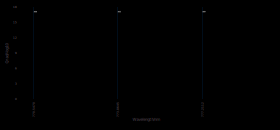

In [75]:
# 显示谱线结果
view_spectrum(lambda_shg, data_shg, 4, view_mode="details")

## 选定某一模式，绘制场分布图

In [58]:
# 作图，给定模式数
n_num, l_num, m_num = 31, 1, 1

lambda_df = @linq data |> 
            where(:n .== n_num, :l .== l_num) |>
            select(:wav = :wavelength)
lambda_select = lambda_df.wav[1]
println(lambda_select)

1548.5504035393735


In [59]:
view_field(data, n_num, l_num, m_num, n, R, mode, "E", quality="fine", scale="log")

Finished ✓      100%|███████████████████████████████████| Time: 0:01:39
